# Histórico de Conflitos de Terra de Cidades Fronteiriças do Brasil
## Análise de Dados Exploratória

---

#### Importar módulos

In [38]:
import pandas as pd
import seaborn as sns
sns.set()

#### Recarregar histórico de conflitos finalizado

In [2]:
history = pd.read_excel('Resultados/histórico-conflitos-atualizado.xlsx')

---
## Conflitos de terra em cidades de fronteira

Contagems e proporções territoriais para o período de 2000 à 2021

### Pré-processamento

#### Formatar campo de identidade do município

In [36]:
history['ID'] = history['MUN'] + ' - ' + history['UF']

#### Calcular total de conflitos por cidade

In [15]:
# Listar colunas com contagems por ano
year_columns = list(filter(lambda col: '20' in col, history.columns))

# Somar colunas com contagems por ano
history['TOTAL'] = history[year_columns].sum(axis=1)

#### Criar coluna para o arco regional ao qual o estado do município pertence

In [ ]:
# Mapeamento de arcos por estado
arcos = {
    'RS': "SUL",
    'SC': "SUL",
    'PR': "SUL",
    'MS': "CENTRO",
    'MT': "CENTRO",
    'PR': "CENTRO",
    'AC': 'NORTE',
    'RO': 'NORTE',
    'RR': 'NORTE',
    'PA': 'NORTE',
    'AP': 'NORTE',
    'AM': 'NORTE',
}

# Criar coluna de `arco` ao qual o município pertence
history['ARCO'] = history['UF'].map(arcos)

### Análise exploratória

#### Contagem total por cidade (Top 10)

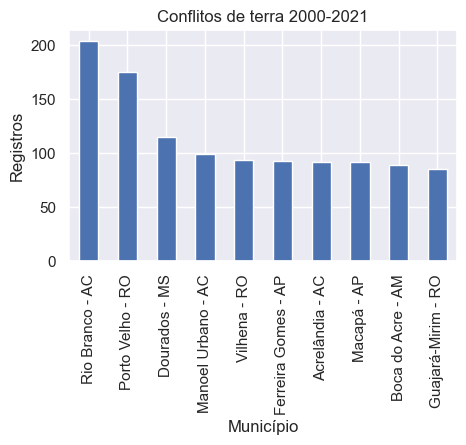

In [41]:
# Conflitos por cidade
city_count = history.set_index('ID')['TOTAL']

# Top 10 cidades com mais conflitos
ax = city_count.nlargest(10).plot.bar(
    title="Conflitos de terra 2000-2021",
    xlabel="Município",
    ylabel="Registros",
    figsize=(5, 3),
)

#### Contagem total por estado

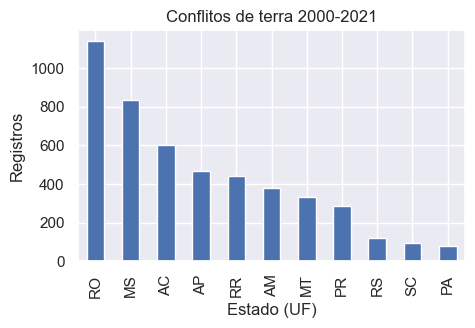

In [48]:
# Conflitos por estado (UF)
uf_count = history.groupby('UF')['TOTAL'].sum()

# Contagem de conflitos por estado 
ax = uf_count.sort_values(ascending=False).plot.bar(
    title="Conflitos de terra 2000-2021",
    xlabel="Estado (UF)",
    ylabel="Registros",
    figsize=(5, 3),
)

#### Proporção por estado (UF)

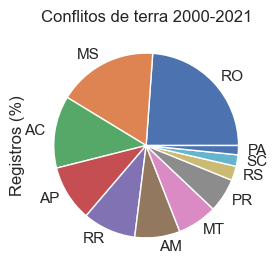

In [76]:
# Proporção de conflitos por estado (UF)
ax = uf_count.sort_values(ascending=False).plot.pie(
    title="Conflitos de terra 2000-2021",
    xlabel="Estado",
    ylabel="Registros (%)",
    figsize=(5, 3),
)

#### Contagem total por arco regional

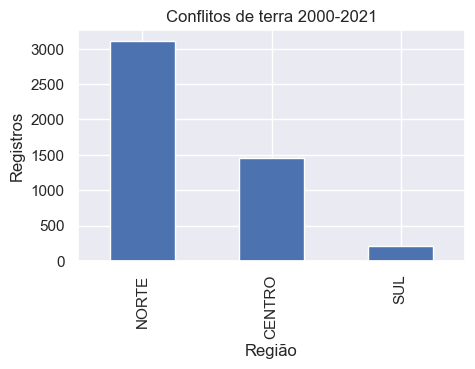

In [75]:
# Conflitos por estado (UF)
arco_count = history.groupby('ARCO')['TOTAL'].sum()

# Contagem de conflitos por arco regional
ax = arco_count.sort_values(ascending=False).plot.bar(
    title="Conflitos de terra 2000-2021",
    xlabel="Região",
    ylabel="Registros",
    figsize=(5, 3),
)

#### Proporção por arco regional

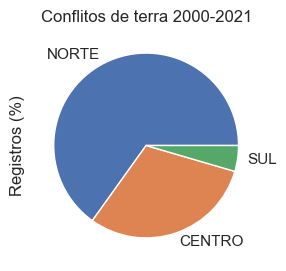

In [74]:
# Proporção de conflitos por arco regional
ax = arco_count.sort_values(ascending=False).plot.pie(
    title="Conflitos de terra 2000-2021",
    xlabel="Região",
    ylabel="Registros (%)",
    figsize=(5, 3),
)

---
## Conflitos de injustiça ambiental e saúde

### Análise exploratória

#### Contagem por cidade

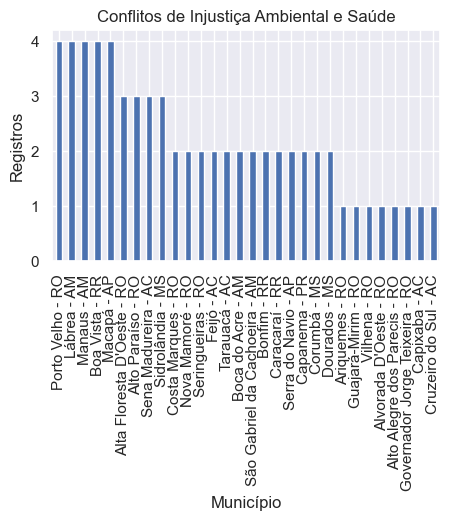

In [82]:
# Conflitos de Injustiça Ambiental e Saúde por cidade
mapa_count = history.set_index('ID')['MAPA DE CONFLITOS']

# Top 10 cidades com mais conflitos
ax = mapa_count.nlargest(30).plot.bar(
    title="Conflitos de Injustiça Ambiental e Saúde",
    xlabel="Município",
    ylabel="Registros",
    figsize=(5, 3),
)

#### Contagem por Estado

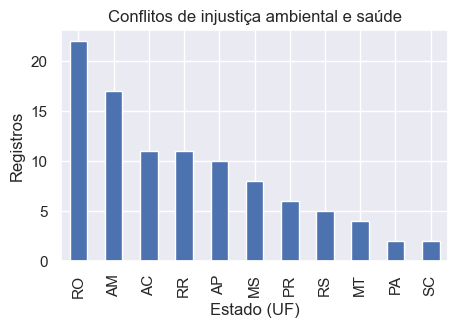

In [84]:
# Conflitos de injustiça ambiental e saúde por estado (UF)
mapa_count = history.groupby('UF')['MAPA DE CONFLITOS'].sum()

# Contagem de conflitos por estado 
ax = mapa_count.sort_values(ascending=False).plot.bar(
    title="Conflitos de injustiça ambiental e saúde",
    xlabel="Estado (UF)",
    ylabel="Registros",
    figsize=(5, 3),
)

#### Proporção por estado (UF)

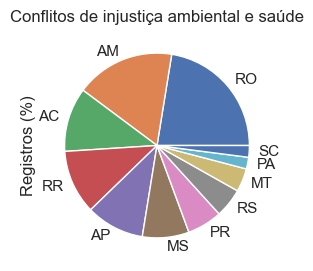

In [88]:
# Proporção de conflitos de injustiça ambiental e saúde por estado (UF)
ax = mapa_count.sort_values(ascending=False).plot.pie(
    title="Conflitos de injustiça ambiental e saúde",
    xlabel="Estado",
    ylabel="Registros (%)",
    figsize=(5, 3),
)

#### Contagem por arco regional

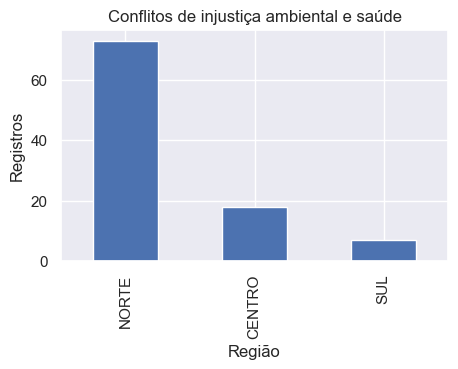

In [90]:
# Conflitos de injustiça ambiental e saúde por estado (UF)
arco_count = history.groupby('ARCO')['MAPA DE CONFLITOS'].sum()

# Contagem de conflitos de injustiça ambiental e saúde por arco regional
ax = arco_count.sort_values(ascending=False).plot.bar(
    title="Conflitos de injustiça ambiental e saúde",
    xlabel="Região",
    ylabel="Registros",
    figsize=(5, 3),
)

#### Proporção por arco regional

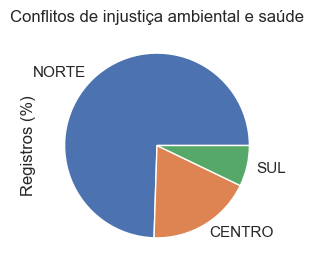

In [91]:
# Proporção de conflitos de injustiça ambiental e saúde por arco regional
ax = arco_count.sort_values(ascending=False).plot.pie(
    title="Conflitos de injustiça ambiental e saúde",
    xlabel="Região",
    ylabel="Registros (%)",
    figsize=(5, 3),
)